In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.tsa.arima_process as smtsa
import statsmodels.tsa.arima_model as smmodel
import statsmodels.tsa.stattools as stattools
import statsmodels.graphics.tsaplots as tsaplots
from pandas.plotting import autocorrelation_plot

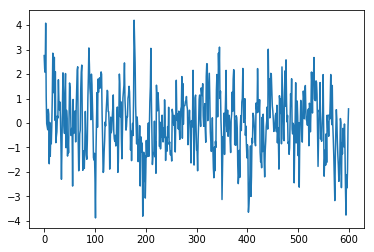

In [7]:
# Number of samples
n = 600
# Generate AR(1) dataset
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plt.plot(ar1_data)

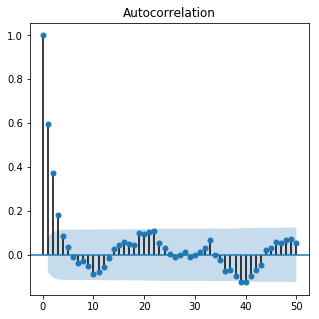

In [34]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
p1 = tsaplots.plot_acf(ar1_data,lags=50,ax=ax)

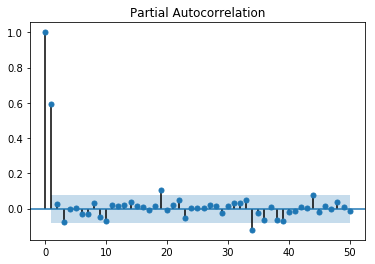

In [35]:
t1 = tsaplots.plot_pacf(ar1_data,lags=50)

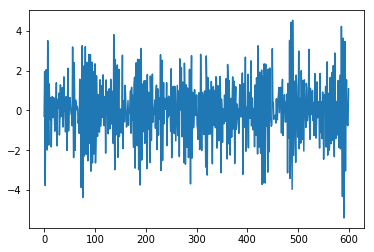

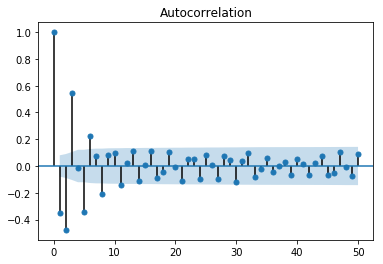

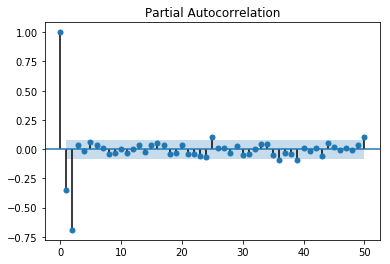

In [36]:
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plt.plot(ar2_data)
t1 = tsaplots.plot_acf(ar2_data,lags=50)
t2 = tsaplots.plot_pacf(ar2_data,lags=50)

In [27]:
# Build AR(1) model
ar1model = smmodel.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -869.971
Method:                           mle   S.D. of innovations              1.031
Date:                Wed, 27 Mar 2019   AIC                           1743.942
Time:                        17:36:12   BIC                           1752.736
Sample:                             0   HQIC                          1747.365
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.5984      0.033     18.230      0.000       0.534       0.663
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6712           +0.0000j            1.6712            0.0000
-----------------------------------------------------------------------------
"""

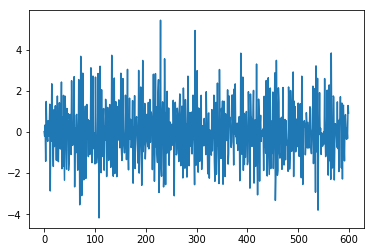

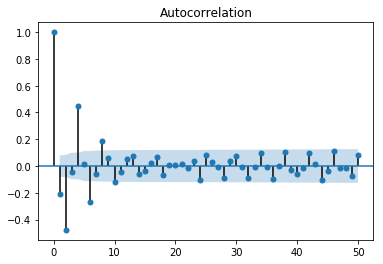

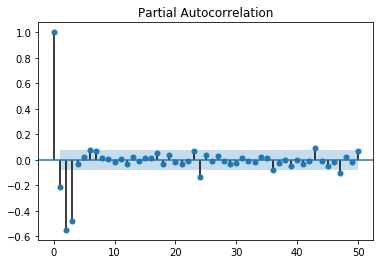

In [38]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plt.plot(ar3_data)
t1 = tsaplots.plot_acf(ar3_data,lags=50)
t2 = tsaplots.plot_pacf(ar3_data,lags=50)

In [20]:
# Build AR(3) model
ar3model = smmodel.ARMA(ar3_data.tolist(), order=(3, 0))
ar3=ar3model.fit(maxlag=30, method='mle', trend='nc')
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -832.589
Method:                           mle   S.D. of innovations              0.968
Date:                Wed, 27 Mar 2019   AIC                           1673.178
Time:                        17:25:29   BIC                           1690.766
Sample:                             0   HQIC                          1680.025
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5863      0.035    -16.745      0.000      -0.655      -0.518
ar.L2.y       -0.7351      0.030    -24.641      0.000      -0.794      -0.677
ar.L3.y       -0.5125      0.035    -14.672      0.000      -0.581      -0.444
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0447           -1.1307j            1.1316           -0.2437
AR.2            0.0447           +1.1307j            1.1316            0.2437
AR.3           -1.5240           -0.0000j            1.5240           -0.5000
-----------------------------------------------------------------------------
"""

In [28]:
ar3.forecast(10)

(array([ 1.16722101,  0.07204248, -0.79755121, -0.18352779,  0.65699465,
         0.15844968, -0.48183063, -0.1706793 ,  0.37308148,  0.15366263]),
 array([0.96774128, 1.12179798, 1.18402415, 1.19265775, 1.28759021,
        1.30237394, 1.34002195, 1.34241388, 1.37237191, 1.37388446]),
 array([[-0.72951705,  3.06395907],
        [-2.12664117,  2.27072612],
        [-3.11819591,  1.52309349],
        [-2.52109402,  2.15403844],
        [-1.8666358 ,  3.18062509],
        [-2.39415633,  2.7110557 ],
        [-3.10822538,  2.14456413],
        [-2.80176216,  2.46040356],
        [-2.31671804,  3.062881  ],
        [-2.53910143,  2.84642669]]))